# Charles Schwab 效率前緣

#### 1. 匯入Robo Advisor的資產池

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as scs
import scipy.optimize as sco
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

- 資產池內容(19)
<br/>SCHX, FNDX, SCHA, FNDA, SCHF, FNDF, SCHC, FNDC, SCHE, FNDE, SCHR, VMBS, SCHP, BNDX, SHYG, EMLC, SCHH, VNQI, IAU

In [2]:
data = pd.DataFrame()
tickers = ['SCHX', 'FNDX', 'SCHA', 'FNDA','SCHF','FNDF','SCHC','FNDC','SCHE','FNDE','SCHR','VMBS','SCHP','BNDX','SHYG','EMLC','SCHH','VNQI','IAU']
q = len(tickers)
records = 0
for i in tickers:
    tmp = web.DataReader(i, 'yahoo', '4/1/2015', datetime.date.today())
    data[i] = tmp['Adj Close']
    if records == 0:
        records = len(tmp)
    else:
        records = min(records, len(tmp))


data.head()

,SCHX,FNDX,SCHA,FNDA,SCHF,FNDF,SCHC,FNDC,SCHE,FNDE,SCHR,VMBS,SCHP,BNDX,SHYG,EMLC,SCHH,VNQI,IAU
Date,,,,,,,,,,,,,,,,,,,
2015-03-31,44.870914,26.858606,53.483742,28.940458,26.504255,23.257940,26.512918,24.449413,21.360584,20.836224,49.515152,47.335659,50.619335,47.938328,37.233822,30.051247,35.317154,44.414474,11.45
2015-04-01,44.671776,26.706411,53.437302,28.791235,26.662069,23.424070,26.618404,24.422428,21.685022,21.119106,49.704853,47.405716,50.969593,47.952518,37.246014,30.292789,35.221355,44.848595,11.65
2015-04-02,44.843769,26.858606,53.604496,28.977760,26.890026,23.642658,26.917292,24.728268,21.991930,21.561115,49.622768,47.414589,50.849758,47.863811,37.246014,30.427837,35.526188,45.140636,11.62
2015-04-06,45.115326,27.046616,53.864571,29.136316,27.170584,23.896225,27.304087,25.088083,22.272528,21.817480,49.723103,47.458961,50.969593,47.961384,37.291721,30.907961,35.909397,45.606331,11.76
2015-04-07,45.015751,26.974993,53.567337,28.977760,27.153049,23.948683,27.181015,24.980141,22.211147,21.755598,49.695751,47.476700,51.117054,47.925911,37.314579,30.727909,35.282314,45.527401,11.70


#### 2. 計算各檔ETF的年化報酬與共變數

In [3]:
returns = np.log(data / data.shift(1))
returns.head()

,SCHX,FNDX,SCHA,FNDA,SCHF,FNDF,SCHC,FNDC,SCHE,FNDE,SCHR,VMBS,SCHP,BNDX,SHYG,EMLC,SCHH,VNQI,IAU
Date,,,,,,,,,,,,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,-0.004448,-0.005683,-0.000869,-0.005170,0.005937,0.007118,0.003971,-0.001104,0.015074,0.013485,0.003824,0.001479,0.006896,0.000296,0.000327,0.008006,-0.002716,0.009727,0.017316
2015-04-02,0.003843,0.005683,0.003124,0.006458,0.008514,0.009288,0.011166,0.012445,0.014054,0.020713,-0.001653,0.000187,-0.002354,-0.001852,0.000000,0.004448,0.008618,0.006491,-0.002578
2015-04-06,0.006037,0.006976,0.004840,0.005457,0.010379,0.010668,0.014267,0.014446,0.012678,0.011820,0.002020,0.000935,0.002354,0.002036,0.001226,0.015656,0.010729,0.010264,0.011976
2015-04-07,-0.002210,-0.002652,-0.005533,-0.005457,-0.000646,0.002193,-0.004518,-0.004312,-0.002760,-0.002840,-0.000550,0.000374,0.002889,-0.000740,0.000613,-0.005842,-0.017617,-0.001732,-0.005115


In [4]:
returns.cov()*252

,SCHX,FNDX,SCHA,FNDA,SCHF,FNDF,SCHC,FNDC,SCHE,FNDE,SCHR,VMBS,SCHP,BNDX,SHYG,EMLC,SCHH,VNQI,IAU
SCHX,0.034798,0.034325,0.037587,0.036485,0.030099,0.030769,0.029385,0.028520,0.032783,0.033377,-0.002954,0.000237,-0.001050,0.000509,0.010057,0.010675,0.030382,0.024185,-0.001137
FNDX,0.034325,0.034833,0.037605,0.037008,0.030081,0.031057,0.029446,0.028553,0.032461,0.033614,-0.003023,0.000212,-0.001050,0.000415,0.010184,0.010831,0.030276,0.024034,-0.001069
SCHA,0.037587,0.037605,0.046578,0.045087,0.033407,0.034475,0.033318,0.031837,0.036024,0.037234,-0.003236,0.000488,-0.000604,0.000670,0.011604,0.012303,0.034805,0.027195,-0.000988
FNDA,0.036485,0.037008,0.045087,0.044601,0.032723,0.033881,0.032692,0.031219,0.035141,0.036675,-0.003165,0.000532,-0.000558,0.000619,0.011383,0.012300,0.034547,0.026650,-0.001161
SCHF,0.030099,0.030081,0.033407,0.032723,0.032374,0.033427,0.031430,0.030137,0.034363,0.035765,-0.002538,0.000425,-0.000233,0.000533,0.009429,0.013245,0.026206,0.026437,0.000532
FNDF,0.030769,0.031057,0.034475,0.033881,0.033427,0.035299,0.032447,0.031088,0.035327,0.037142,-0.002768,0.000314,-0.000314,0.000388,0.009767,0.013820,0.026422,0.027127,0.000523
SCHC,0.029385,0.029446,0.033318,0.032692,0.031430,0.032447,0.032840,0.030423,0.033961,0.035351,-0.002221,0.000654,0.000313,0.000774,0.009688,0.013969,0.026629,0.026796,0.002321
FNDC,0.028520,0.028553,0.031837,0.031219,0.030137,0.031088,0.030423,0.029707,0.032293,0.033465,-0.002359,0.000392,-0.000166,0.000654,0.009074,0.012605,0.025338,0.025102,0.001241
SCHE,0.032783,0.032461,0.036024,0.035141,0.034363,0.035327,0.033961,0.032293,0.046524,0.047385,-0.002605,0.000307,-0.000042,0.000680,0.009939,0.017192,0.027203,0.030661,0.001758
FNDE,0.033377,0.033614,0.037234,0.036675,0.035765,0.037142,0.035351,0.033465,0.047385,0.052032,-0.002695,0.000416,0.000281,0.000653,0.010381,0.018818,0.027733,0.031304,0.002510


In [5]:
annual_returns = returns.mean()*252
annual_returns

SCHX    0.081152
FNDX    0.049586
SCHA    0.007748
FNDA   -0.006495
SCHF    0.004638
FNDF   -0.011775
SCHC   -0.002891
FNDC    0.003948
SCHE    0.005228
FNDE    0.010801
SCHR    0.033173
VMBS    0.026949
SCHP    0.031589
BNDX    0.032693
SHYG    0.028198
EMLC   -0.007420
SCHH    0.004082
VNQI    0.002116
IAU     0.073094
dtype: float64

#### 3. 隨機分配資產初始權重

In [6]:
weights = np.random.random(q)
weights /= np.sum(weights)
weights

array([0.05223231, 0.04996877, 0.0880832 , 0.01876445, 0.06076762,
       0.04200259, 0.08159561, 0.07875832, 0.04106841, 0.07640625,
       0.03910674, 0.06459329, 0.01049557, 0.03043438, 0.06664903,
       0.03309639, 0.06474093, 0.08349801, 0.01773814])

#### 4. 計算預期組合年化Return、Var、std

In [7]:
np.sum(returns.mean()*weights)*252

0.015915340230527427

In [8]:
np.dot(weights.T, np.dot(returns.cov()*252, weights))

0.019073270902735737

In [9]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))

0.13810601327507696

#### 5. 模擬隨機組合（略）

#### 6. 投資組合優化_1（Max Sharpe）

In [10]:
def statistics(weights):
    weights = np.array(weights)
    port_return = np.sum(returns.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([port_return, port_variance, port_return/port_variance])

In [11]:
# 最小化Sharpe的負值
def min_sharpe(weights):
    return -statistics(weights)[2]

# 限制權重總和為1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# 限制權重範圍在0和1之間
bnds = tuple((0,1) for x in range(q))
# 優化起始參數值(x0)
opts = sco.minimize(min_sharpe, q*[1./q,], method='SLSQP', bounds=bnds, constraints=cons)

opts

     fun: -1.3433678898488994
     jac: array([-6.90773129e-04,  9.18186083e-01,  2.81155550e+00,  3.18200330e+00,
        2.37376791e+00,  2.75694250e+00,  2.97383945e+00,  2.37844776e+00,
        2.80211569e+00,  2.60361394e+00,  2.55256891e-04,  6.81182742e-02,
        5.19031942e-01, -4.31507826e-04,  1.22536913e-01,  2.25012325e+00,
        4.78716177e+00,  2.94697256e+00,  3.18586826e-04])
 message: 'Optimization terminated successfully.'
    nfev: 212
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([1.02249224e-01, 2.04237536e-12, 4.71893944e-12, 4.82491612e-12,
       4.36557515e-12, 4.61583985e-12, 4.72882974e-12, 4.36022950e-12,
       4.73294550e-12, 4.76757465e-12, 6.61928668e-01, 0.00000000e+00,
       1.65664149e-11, 2.31198930e-01, 2.48980077e-12, 3.71833048e-12,
       5.11250706e-12, 4.40030212e-12, 4.62317855e-03])

In [12]:
# 最優組合的權重向量
opts['x'].round(3)

array([0.102, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.662, 0.   , 0.   , 0.231, 0.   , 0.   , 0.   , 0.   ,
       0.005])

In [13]:
#Tangency portfolio 的預期收益率、預期波動率、最大Sharpe
statistics(opts['x'].round(3))

array([0.03815569, 0.02840311, 1.34336335])

#### 7. 投資組合優化_2（Minimum-Variance portfolio)

In [14]:
def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, q*[1./q,], method='SLSQP',bounds=bnds, constraints=cons)

optv

     fun: 0.026025540990230023
     jac: array([0.02783841, 0.02649138, 0.03661202, 0.03598703, 0.03115536,
       0.02761598, 0.04151826, 0.03260743, 0.0345004 , 0.03635821,
       0.02582618, 0.02580937, 0.03525593, 0.02633094, 0.02621405,
       0.03908166, 0.08438449, 0.04774677, 0.05463297])
 message: 'Optimization terminated successfully.'
    nfev: 357
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([0.00000000e+00, 4.64247198e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.73031121e-18, 0.00000000e+00,
       9.73053212e-18, 7.58089475e-18, 4.13537121e-01, 1.50805667e-01,
       0.00000000e+00, 2.70616843e-01, 1.60397896e-01, 3.18041165e-18,
       6.62747596e-18, 0.00000000e+00, 0.00000000e+00])

In [15]:
# MVP 的預期收益率、預期波動率、最大Sharpe
statistics(optv['x']).round(3)

array([0.031, 0.026, 1.206])

#### 8. 組合的有效前緣

In [16]:
def min_variance(weights):
    return statistics(weights)[1]

# 在不同目標收益率(target_returns)水平循環時，最小化的約束條件會變化
target_returns = np.linspace(statistics(optv['x'])[0], annual_returns.max(), 50)
target_variance = []
#cnt = 0

for tar in target_returns:
    #cnt+=1
    cons = ({'type':'eq', 'fun': lambda x: statistics(x)[0]-tar},
           {'type':'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_variance, q*[1./q,], method='SLSQP', bounds=bnds, constraints=cons)
    target_variance.append(res['fun'])
    #print(cnt)

target_variance = np.array(target_variance)

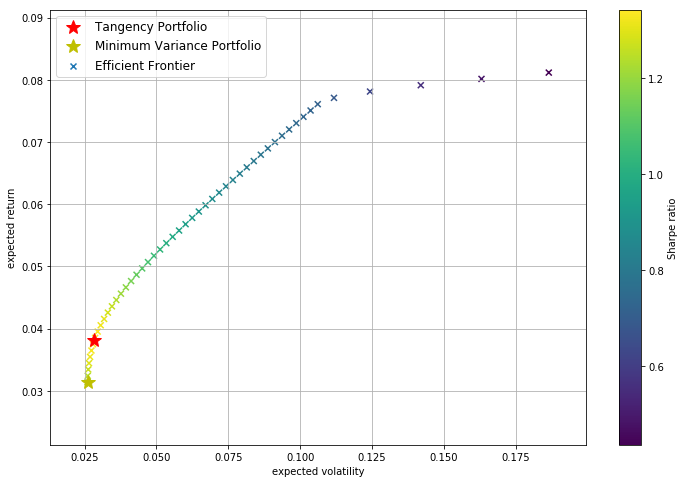

In [17]:
plt.figure(figsize=(12,8))
#圈圈：模擬點
#plt.scatter(port_variance, port_returns, c=port_returns/port_variance, marker='o')
# 叉號：有效前緣
plt.scatter(target_variance, target_returns, c=target_returns/target_variance, marker='x', label='Efficient Frontier')
#紅星：最高Sharpe
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0],'r*', markersize=15.0, label='Tangency Portfolio')
#黃星：MVP
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0],'y*', markersize=15.0, label='Minimum Variance Portfolio')

plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend(loc='upper left', fontsize=12)
plt.colorbar(label='Sharpe ratio')
plt.title("Charles Schwab's Efficient Frontier")
plt.show()

In [18]:
ret_var = np.vstack((target_returns,target_variance))
np.savetxt("CharlesSchwab.csv", ret_var, delimiter=",")

#### 9. 加入新一檔ETF

In [19]:
add_etf = web.DataReader('SCHG', 'yahoo', '4/1/2015', datetime.date.today())
data['SCHG'] = add_etf['Adj Close']
new_q = len(data.columns)

data.head()

,SCHX,FNDX,SCHA,FNDA,SCHF,FNDF,SCHC,FNDC,SCHE,FNDE,SCHR,VMBS,SCHP,BNDX,SHYG,EMLC,SCHH,VNQI,IAU,SCHG
Date,,,,,,,,,,,,,,,,,,,,
2015-03-31,44.870914,26.858606,53.483742,28.940458,26.504255,23.257940,26.512918,24.449413,21.360584,20.836224,49.515152,47.335659,50.619335,47.938328,37.233822,30.051247,35.317154,44.414474,11.45,51.011326
2015-04-01,44.671776,26.706411,53.437302,28.791235,26.662069,23.424070,26.618404,24.422428,21.685022,21.119106,49.704853,47.405716,50.969593,47.952518,37.246014,30.292789,35.221355,44.848595,11.65,50.746189
2015-04-02,44.843769,26.858606,53.604496,28.977760,26.890026,23.642658,26.917292,24.728268,21.991930,21.561115,49.622768,47.414589,50.849758,47.863811,37.246014,30.427837,35.526188,45.140636,11.62,50.992393
2015-04-06,45.115326,27.046616,53.864571,29.136316,27.170584,23.896225,27.304087,25.088083,22.272528,21.817480,49.723103,47.458961,50.969593,47.961384,37.291721,30.907961,35.909397,45.606331,11.76,51.276478
2015-04-07,45.015751,26.974993,53.567337,28.977760,27.153049,23.948683,27.181015,24.980141,22.211147,21.755598,49.695751,47.476700,51.117054,47.925911,37.314579,30.727909,35.282314,45.527401,11.70,51.143894


In [20]:
new_returns = np.log(data / data.shift(1))
new_returns.head()

,SCHX,FNDX,SCHA,FNDA,SCHF,FNDF,SCHC,FNDC,SCHE,FNDE,SCHR,VMBS,SCHP,BNDX,SHYG,EMLC,SCHH,VNQI,IAU,SCHG
Date,,,,,,,,,,,,,,,,,,,,
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,-0.004448,-0.005683,-0.000869,-0.005170,0.005937,0.007118,0.003971,-0.001104,0.015074,0.013485,0.003824,0.001479,0.006896,0.000296,0.000327,0.008006,-0.002716,0.009727,0.017316,-0.005211
2015-04-02,0.003843,0.005683,0.003124,0.006458,0.008514,0.009288,0.011166,0.012445,0.014054,0.020713,-0.001653,0.000187,-0.002354,-0.001852,0.000000,0.004448,0.008618,0.006491,-0.002578,0.004840
2015-04-06,0.006037,0.006976,0.004840,0.005457,0.010379,0.010668,0.014267,0.014446,0.012678,0.011820,0.002020,0.000935,0.002354,0.002036,0.001226,0.015656,0.010729,0.010264,0.011976,0.005556
2015-04-07,-0.002210,-0.002652,-0.005533,-0.005457,-0.000646,0.002193,-0.004518,-0.004312,-0.002760,-0.002840,-0.000550,0.000374,0.002889,-0.000740,0.000613,-0.005842,-0.017617,-0.001732,-0.005115,-0.002589


In [21]:
new_annual_returns = new_returns.mean()*252
new_annual_returns

SCHX    0.081152
FNDX    0.049586
SCHA    0.007748
FNDA   -0.006495
SCHF    0.004638
FNDF   -0.011775
SCHC   -0.002891
FNDC    0.003948
SCHE    0.005228
FNDE    0.010801
SCHR    0.033173
VMBS    0.026949
SCHP    0.031589
BNDX    0.032693
SHYG    0.028198
EMLC   -0.007420
SCHH    0.004082
VNQI    0.002116
IAU     0.073094
SCHG    0.108347
dtype: float64

In [22]:
new_weights = np.random.random(new_q)
new_weights /= np.sum(new_weights)
new_weights

array([7.00330710e-03, 9.46329499e-02, 4.32595367e-02, 4.59478848e-02,
       6.21880560e-02, 3.27555443e-02, 7.70036129e-02, 9.40877411e-05,
       1.95429040e-02, 1.20158840e-02, 4.44176639e-02, 6.77637538e-04,
       7.69275637e-02, 2.93339381e-02, 8.95084870e-02, 9.12991044e-02,
       9.81352561e-02, 8.93663429e-02, 3.32067574e-02, 5.26834815e-02])

#### New Tangency Portfolio

In [23]:
def new_statistics(new_weights):
    new_weights = np.array(new_weights)
    port_return = np.sum(new_returns.mean()*new_weights)*252
    port_variance = np.sqrt(np.dot(new_weights.T, np.dot(new_returns.cov()*252, new_weights)))
    return np.array([port_return, port_variance, port_return/port_variance])

# 最小化Sharpe的負值
def new_min_sharpe(new_weights):
    return -new_statistics(new_weights)[2]

# 限制權重總和為1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# 限制權重範圍在0和1之間
new_bnds = tuple((0,1) for x in range(new_q))
# 優化起始參數值(x0)
new_opts = sco.minimize(new_min_sharpe, new_q*[1./new_q,], method='SLSQP', bounds=new_bnds, constraints=cons)

new_opts

     fun: -1.415218819459288
     jac: array([ 5.50434381e-01,  1.30420458e+00,  3.29707411e+00,  3.56837918e+00,
        2.73069209e+00,  3.07872142e+00,  3.32480736e+00,  2.70866369e+00,
        3.26822414e+00,  3.00783458e+00, -3.76999378e-05,  8.54041129e-02,
        5.29824689e-01,  1.10015273e-04,  2.18662560e-01,  2.32256685e+00,
        4.95706369e+00,  3.21380532e+00, -3.20404768e-04,  4.38392162e-05])
 message: 'Optimization terminated successfully.'
    nfev: 268
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([0.00000000e+00, 2.08687406e-11, 2.29723386e-11, 2.27976114e-11,
       2.10347832e-11, 2.14215050e-11, 2.15148530e-11, 2.07967952e-11,
       2.21381396e-11, 2.21211735e-11, 6.84759137e-01, 1.28587299e-11,
       0.00000000e+00, 2.02681646e-01, 1.49746093e-11, 1.69248742e-11,
       2.23625735e-11, 2.01921037e-11, 3.82338733e-03, 1.08735829e-01])

In [24]:
new_opts['x'].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.685, 0.   , 0.   , 0.203, 0.   , 0.   , 0.   , 0.   ,
       0.004, 0.109])

In [25]:
new_statistics(new_opts['x'].round(3))

array([0.04146249, 0.02929761, 1.4152175 ])

#### New Minimum Variance Portfolio

In [26]:
def new_min_variance(new_weights):
    return new_statistics(new_weights)[1]

new_optv = sco.minimize(new_min_variance, new_q*[1./new_q,], method='SLSQP', bounds=new_bnds, constraints=cons)

new_optv

     fun: 0.026025059498574605
     jac: array([0.02783542, 0.02649213, 0.03660687, 0.03598405, 0.0311547 ,
       0.02761765, 0.04151978, 0.03260321, 0.03449986, 0.03636027,
       0.02583983, 0.02580493, 0.03526782, 0.02630681, 0.02622354,
       0.03909372, 0.08438239, 0.04773858, 0.0546457 , 0.02714475])
 message: 'Optimization terminated successfully.'
    nfev: 374
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([6.63245727e-19, 4.69396328e-03, 1.50010761e-17, 0.00000000e+00,
       2.14727850e-18, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.41444155e-17, 0.00000000e+00, 4.14717253e-01, 1.50598441e-01,
       1.45740310e-16, 2.69362155e-01, 1.60628188e-01, 4.06840832e-19,
       1.86477257e-17, 0.00000000e+00, 2.30505671e-18, 5.62331425e-18])

In [27]:
# new_MVP 的預期收益率、預期波動率、最大Sharpe
new_statistics(new_optv['x']).round(3)

array([0.031, 0.026, 1.206])

#### 繪製新的效率前緣

In [28]:
def new_min_variance(new_weights):
    return new_statistics(new_weights)[1]

# 在不同目標收益率(target_retruns)水平循環時，最小化的約束條件會變化
new_target_returns = np.linspace(new_statistics(new_optv['x'])[0], new_annual_returns.max(), 50)
new_target_variance = []
#cnt = 0

for tar in new_target_returns:
    #cnt+=1
    new_cons = ({'type':'eq', 'fun': lambda x: new_statistics(x)[0]-tar},
           {'type':'eq', 'fun': lambda x: np.sum(x) - 1})
    new_res = sco.minimize(new_min_variance, new_q*[1./new_q,], method='SLSQP', bounds=new_bnds, constraints=new_cons)
    new_target_variance.append(new_res['fun'])
    #print(cnt)

new_target_variance = np.array(new_target_variance)

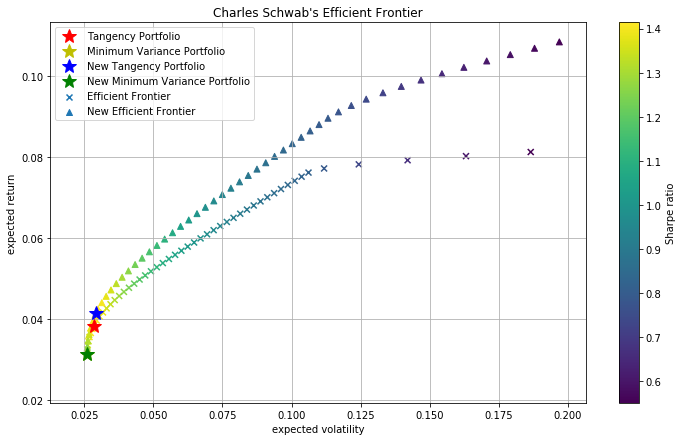

Decrease in MVP volatility: 4.814916554178594e-07
Increase in tangency porfolio's sharpe ratio: 0.07185092961038864


In [47]:
#舊圖
plt.figure(figsize=(12,7))
# 叉號：有效前緣
plt.scatter(target_variance, target_returns, c=target_returns/target_variance, marker='x', label='Efficient Frontier')
#紅星：最高Sharpe
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0],'r*', markersize=15.0, label='Tangency Portfolio')
#黃星：MVP
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0],'y*', markersize=15.0, label='Minimum Variance Portfolio')


#新圖
# 叉號：有效前緣
plt.scatter(new_target_variance, new_target_returns, c=new_target_returns/new_target_variance, marker='^', label='New Efficient Frontier')
#紅星：最高Sharpe
plt.plot(new_statistics(new_opts['x'])[1],new_statistics(new_opts['x'])[0],'b*', markersize=15.0, label='New Tangency Portfolio')
#黃星：MVP
plt.plot(new_statistics(new_optv['x'])[1],new_statistics(new_optv['x'])[0],'g*', markersize=15.0, label='New Minimum Variance Portfolio')


plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend(loc='upper left', fontsize=10)
plt.colorbar(label='Sharpe ratio')
plt.title("Charles Schwab's Efficient Frontier: After")
plt.show()

print("Decrease in MVP volatility:", optv['fun']-new_optv['fun'])
print("Increase in tangency porfolio's sharpe ratio:",(-new_opts['fun'])-(-opts['fun']))